In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
df=pd.read_csv("Wine dataset.csv")
df

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
df.shape

(178, 14)

In [6]:
df.size

2492

In [7]:
df.columns

Index(['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline '],
      dtype='object')

In [9]:
df.isnull().sum()

class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [10]:
df.duplicated().value_counts()

False    178
Name: count, dtype: int64

## Data Visualization

In [11]:
# select the columns for line plots
columns=['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Proanthocyanins','Color intensity','Hue']

In [12]:
# Get unique classes
classes=df['class'].unique()

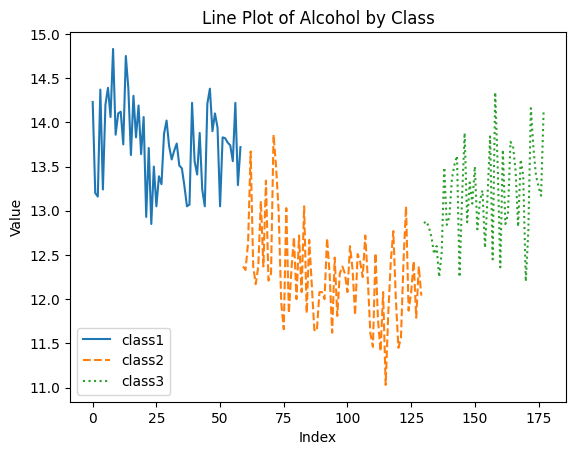

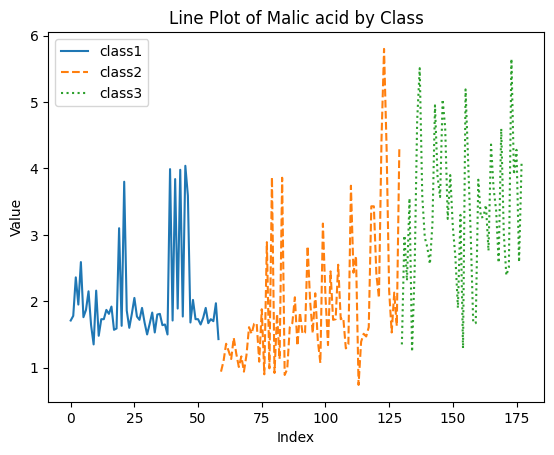

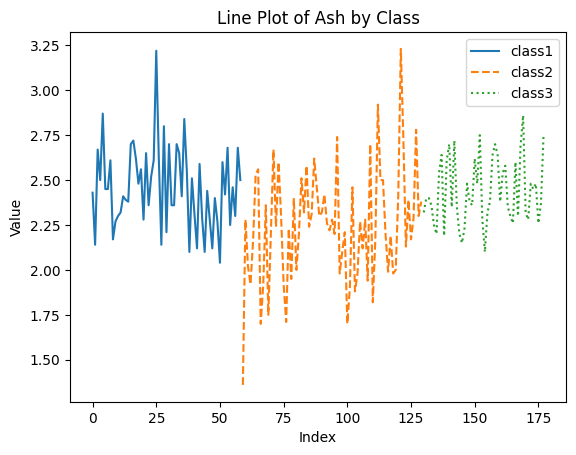

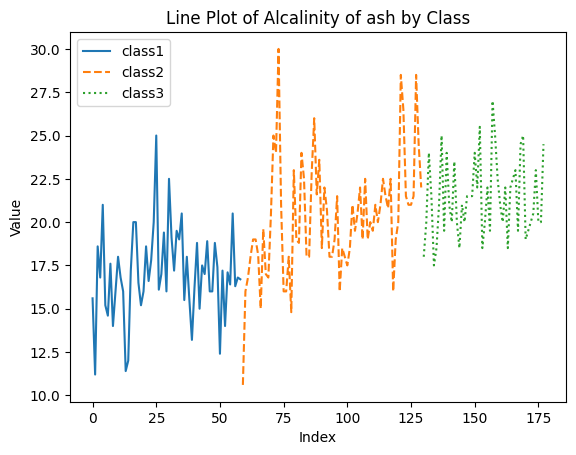

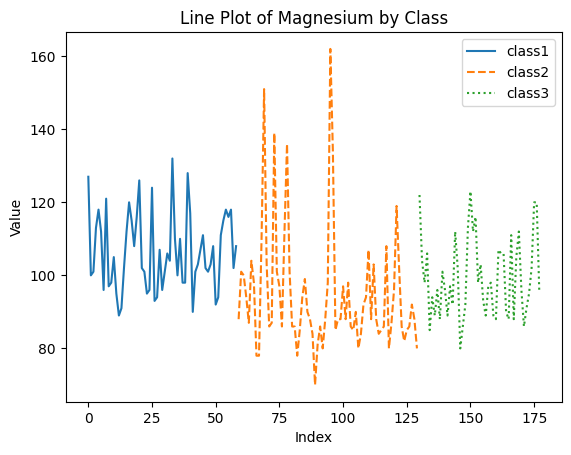

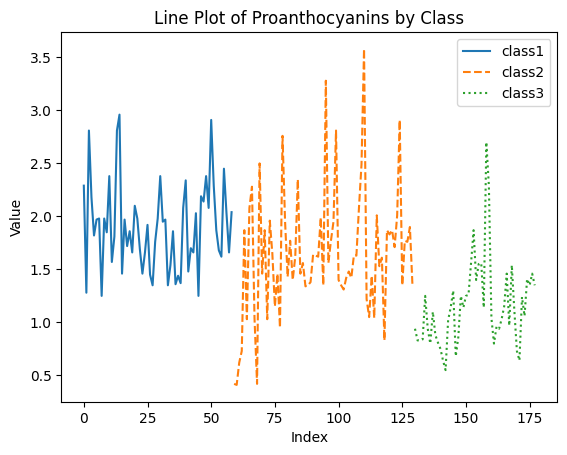

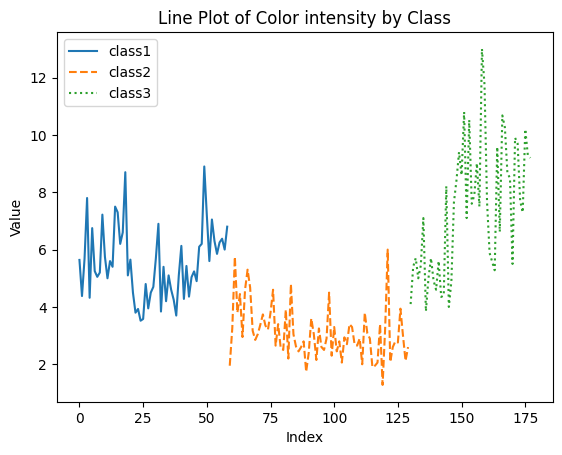

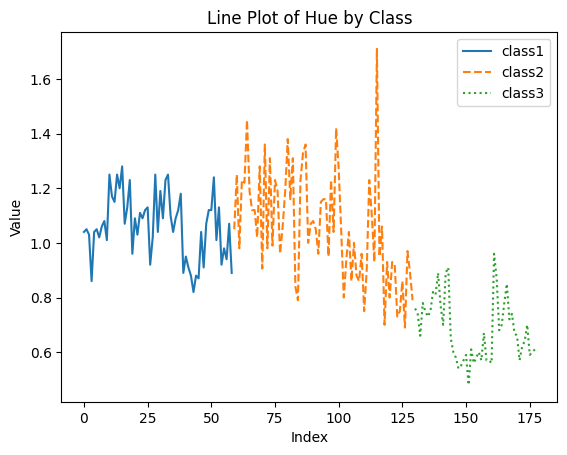

In [15]:
#Define different visual styles for each class
styles=['-','--',':']

# Create lineplots for each columns,differentiated by class
for column in columns:
    plt.figure()
    for i,cls in enumerate(classes):
        # filter the data by class
        data=df[df['class']==cls]
        plt.plot(data.index,data[column], label=f'class{cls}',linestyle=styles[i%len(styles)])
        plt.title(f'Line Plot of {column} by Class')
        plt.xlabel("Index")
        plt.ylabel("Value")
        plt.legend()
plt.show()

## Data Modeling

In [16]:
# Split the data into features (X) and the target variable (Y)
X= df.drop("class",axis=1)
y= df["class"]

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#Create and train a Random Forest Classifier
rf_classifier= RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

#Create and train a Logistic Regression Classifier
lr_classifier= LogisticRegression()
lr_classifier.fit(X_train, y_train)

#Create and train a Support Vector Machine Classifier
svm_classifier= SVC ()
svm_classifier.fit(X_train, y_train)

#Create and train a Gradient Boosting Classifier
gb_classifier= GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

#Predict the class labels for the test set using each classifier
y_rf_pred= rf_classifier.predict(X_test)
y_lr_pred= lr_classifier.predict(X_test)
y_svm_pred= svm_classifier.predict(X_test)
y_gb_pred= gb_classifier.predict(X_test)

#Calculate the accuracy of each classifier
accuracy_rf= accuracy_score(y_test, y_rf_pred)
accuracy_lr= accuracy_score(y_test,y_lr_pred)
accuracy_svm=accuracy_score(y_test, y_svm_pred)
accuracy_gb=accuracy_score(y_test,y_gb_pred)

#Print the accuracies of each classifier
print(f"Random Forest Classifier Accuracy: {accuracy_rf}")
print(f"Logistic Regression Classifier Accuracy: {accuracy_lr}")
print(f"SVM Classifier Accuracy: {accuracy_svm}")
print(f"Gradient Classifier Accuracy: {accuracy_gb}")


C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest Classifier Accuracy: 1.0
Logistic Regression Classifier Accuracy: 0.9722222222222222
SVM Classifier Accuracy: 0.8055555555555556
Gradient Classifier Accuracy: 0.9444444444444444


## Creating Confusion Matrix

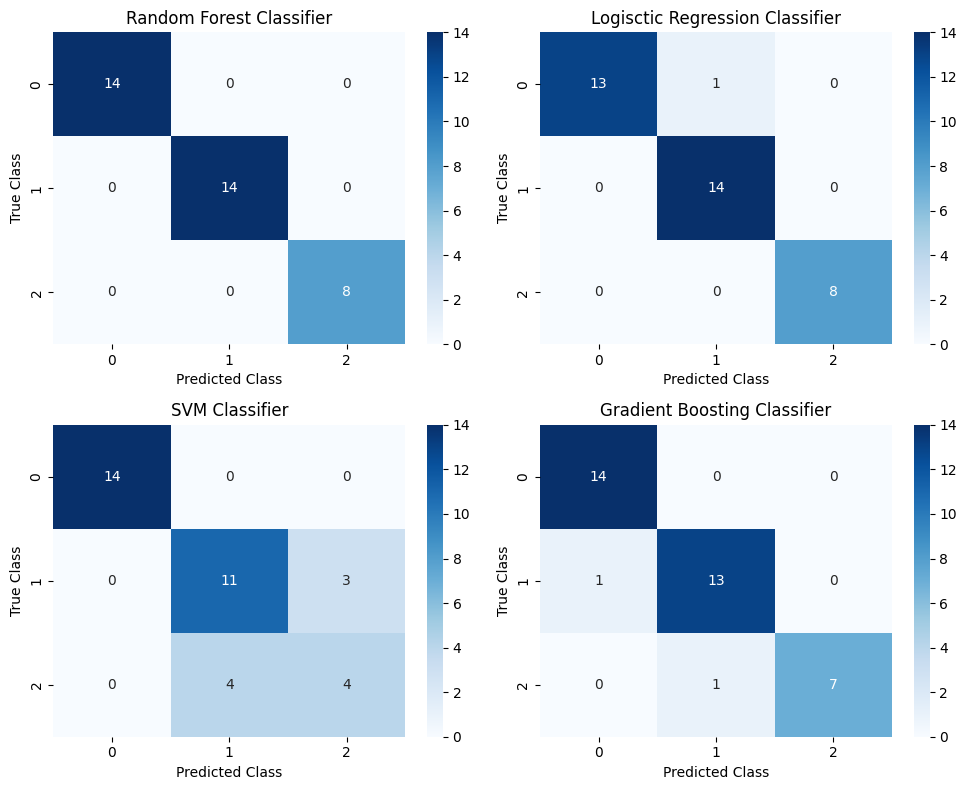

In [17]:
#Create confusion matrices
rf_cm= confusion_matrix(y_test,y_rf_pred)
lr_cm= confusion_matrix(y_test,y_lr_pred)
svm_cm= confusion_matrix(y_test,y_svm_pred)
gb_cm= confusion_matrix(y_test,y_gb_pred)

#plot confusion matrices
plt.figure(figsize=(10,8))

plt.subplot(221)
sns.heatmap(rf_cm, annot=True,cmap="Blues", fmt="g")
plt.title("Random Forest Classifier")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

plt.subplot(222)
sns.heatmap(lr_cm, annot=True,cmap="Blues", fmt="g")
plt.title("Logisctic Regression Classifier")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

plt.subplot(223)
sns.heatmap(svm_cm, annot=True,cmap="Blues",fmt="g")
plt.title("SVM Classifier")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

plt.subplot(224)
sns.heatmap(gb_cm, annot=True, cmap="Blues",fmt="g")
plt.title("Gradient Boosting Classifier")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

plt.tight_layout()
plt.show()

## Determining tthe Best Model

In [22]:
# Accuracy score of each classifier
accuracy_rf=1.0
accuracy_lr= 0.9722222222222222
accuracy_svm= 0.8055555555555556
accuracy_gb= 0.9444444444444444

# Create a dictionary to store the accuracy scores
accuracy_scores={"Random Forest": accuracy_rf,
               "Logistic Regression": accuracy_lr,
               "SVM": accuracy_svm,
               "Gradient Boosting": accuracy_gb}

#Determine the best model based on the highest accuracy score
best_model= max(accuracy_scores,key= accuracy_scores.get)
print(f"The best model is: {best_model}")

               

The best model is: Random Forest


## Testing on New Data

In [25]:
#Example input for prediction
new_data= [[14.37, 1.95, 2.50, 16.8, 113, 3.85, 3.49, 0.24, 2.18, 7.80, 0.86, 3.45, 1480],
           [14.13, 4.10, 2.74, 24.5, 96, 2.05, 0.76, 0.56, 1.35, 9.2, 0.61, 1.60,560]]
#Random Forest
rf_predictions= rf_classifier.predict(new_data)
print("Random Forest Predictions:", rf_predictions)

Random Forest Predictions: [1 3]


C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
